# A02: Words, Transducers, Language Models, and N-grams

                    By Besnik Balaj & Amanda Ly
I plege my honor that I have abided by the Stevens Honor System 
                      -Amanda Ly & Besnik Balaj

Deliverables:

1. Respond to J&M 2nd Exercises 3.6, 3.8, and 4.3. You are welcome to use existing n-gram programs. If you can find packages and procedures in software that apply you can use them but report on where you got them.
2. From BKL for Python 3 (online) submit the results of the Your Turn practice on p 69 and 70 and Exercise 2.8.5, 2.8.14 (possibly used in disambiguation), and 2.8.27 (for only verbs) on pages 74-77. The concordance tool was first used on p4. You should become quite familiar with the use of WordNet and its companion SentiWordNet.
3. For later work relevant to Chapters 10-13 on part-of-speech parsing find the longest sentence in one of the corpora: Moby Dick, Sense and Sensibility, Inaugural Address Corpus, The Wall Street Journal, and The Man Who Was Thursday, downloaded from instructions on page 2 and 3 of BKL. In effect find the longest string between consecutive periods. 
4. Search for perplexity measures (Section 3.7 in J&M 3rd) in Python and compare perplexity to lexical diversity, as specified on page 9 of BKL, on the corpus downloaded from the Python NLTK in the previous exercise. What does each measure? Is there a potential relationship and, if so, what is it? Is there a relationship of these notions to information content? This is not a pure programming exercise. You should interpret what each means in your own words.


### 1. J&M 2nd Exercises

Exercise 3.6
Read Porter (1980) or see Martin Poerter's official homepage on the porter stemmer. 
Implement one of the steps of the Porter Stemmer as a transducer.

    **See handwritten notes. for this case**

Exercise 3.8
Write a program that takes a word and, using an on-line dictionary, 
computes possible anagrams of the word, each of which is a legal word.

In [1]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
import nltk
from nltk.corpus import wordnet

def perms(elements):
    if len(elements) <=1:
        return elements
    else:
        tmp = []
        for perm in perms(elements[1:]):
            for i in range(len(elements)):
                tmp.append(perm[:i] + elements[0:1] + perm[i:])
        return tmp

def wordGram(word):
    legalWrds = []
    #given a word make as many legal anagrams
    possibleWords = perms(word)
    for i in possibleWords:
        if wordnet.synsets(i):
            legalWrds.append(i)
    print(legalWrds)

In [3]:
wordGram('Hell')

['Hell', 'Hell']


Exercise 4.3
Run your N-gram program on two different small corpora of your choice 
(you might use email text or newsgroups). Now compare the statistics of the two corpora. 
What are the differences in the most common unigrams between the two? 
How about interesting differences in bigrams?

In [4]:
#This corpus is just a long text I am using from a email

testEmail = "Hi, Designers and product visionaries both ask the same question: How can I go from prototype to finished, polished product?We’d like to help if we can. Fluid UI has partnered with Developerfair.com to create an interactive tool which will guide you through some basic questions to help you get a sense for your project. Fill out the super quick questionnaire and we promise to follow up with a personalised reply within 24-72 hours with a list of tips for your project.We\'ll also suggesting some possible next steps, including the kind of resources you might need and how much it is likely to cost."

testEmail2 = "GraphConnect 2020 is just around the corner (April 20-22 in New York City), and we’re calling on all graphistas to submit their presentation ideas to share with attendees. The Neo4j community has connected so many people who use graphs in incredible ways. Now it’s your turn to share your experiences with others. We look forward to reading your proposals! Thanks,"

In [5]:
#obtained from StackOverflow here
#https://stackoverflow.com/questions/13423919/computing-n-grams-using-python
def ngrams2(input, n):
    input = input.split(' ')
    output = {}
    for i in range(len(input)-n+1):
        g = ' '.join(input[i:i+n])
        output.setdefault(g,0)
        output[g] += 1
    return output

In [6]:
ngrams2(str(text1),2)

{'<Text: Moby': 1,
 'Moby Dick': 1,
 'Dick by': 1,
 'by Herman': 1,
 'Herman Melville': 1,
 'Melville 1851>': 1}

In [7]:
ngrams2(testEmail,2)

{'Hi, Designers': 1,
 'Designers and': 1,
 'and product': 1,
 'product visionaries': 1,
 'visionaries both': 1,
 'both ask': 1,
 'ask the': 1,
 'the same': 1,
 'same question:': 1,
 'question: How': 1,
 'How can': 1,
 'can I': 1,
 'I go': 1,
 'go from': 1,
 'from prototype': 1,
 'prototype to': 1,
 'to finished,': 1,
 'finished, polished': 1,
 'polished product?We’d': 1,
 'product?We’d like': 1,
 'like to': 1,
 'to help': 2,
 'help if': 1,
 'if we': 1,
 'we can.': 1,
 'can. Fluid': 1,
 'Fluid UI': 1,
 'UI has': 1,
 'has partnered': 1,
 'partnered with': 1,
 'with Developerfair.com': 1,
 'Developerfair.com to': 1,
 'to create': 1,
 'create an': 1,
 'an interactive': 1,
 'interactive tool': 1,
 'tool which': 1,
 'which will': 1,
 'will guide': 1,
 'guide you': 1,
 'you through': 1,
 'through some': 1,
 'some basic': 1,
 'basic questions': 1,
 'questions to': 1,
 'help you': 1,
 'you get': 1,
 'get a': 1,
 'a sense': 1,
 'sense for': 1,
 'for your': 2,
 'your project.': 1,
 'project. Fill

In [8]:
ngrams2(testEmail2,2)

{'GraphConnect 2020': 1,
 '2020 is': 1,
 'is just': 1,
 'just around': 1,
 'around the': 1,
 'the corner': 1,
 'corner (April': 1,
 '(April 20-22': 1,
 '20-22 in': 1,
 'in New': 1,
 'New York': 1,
 'York City),': 1,
 'City), and': 1,
 'and we’re': 1,
 'we’re calling': 1,
 'calling on': 1,
 'on all': 1,
 'all graphistas': 1,
 'graphistas to': 1,
 'to submit': 1,
 'submit their': 1,
 'their presentation': 1,
 'presentation ideas': 1,
 'ideas to': 1,
 'to share': 2,
 'share with': 1,
 'with attendees.': 1,
 'attendees. The': 1,
 'The Neo4j': 1,
 'Neo4j community': 1,
 'community has': 1,
 'has connected': 1,
 'connected so': 1,
 'so many': 1,
 'many people': 1,
 'people who': 1,
 'who use': 1,
 'use graphs': 1,
 'graphs in': 1,
 'in incredible': 1,
 'incredible ways.': 1,
 'ways. Now': 1,
 'Now it’s': 1,
 'it’s your': 1,
 'your turn': 1,
 'turn to': 1,
 'share your': 1,
 'your experiences': 1,
 'experiences with': 1,
 'with others.': 1,
 'others. We': 1,
 'We look': 1,
 'look forward': 1,

In [9]:
MB = str(nltk.corpus.gutenberg.words('melville-moby_dick.txt'))
ngrams2(MB,2)

{"['[', 'Moby',": 1,
 "'Moby', 'Dick',": 1,
 "'Dick', 'by',": 1,
 "'by', 'Herman',": 1,
 "'Herman', 'Melville',": 1,
 "'Melville', ...]": 1}

In [10]:
#ngrams2(str(gutenberg.sents('shakespeare-macbeth.txt')),2)

In [11]:
from nltk import ngrams
bigrams = ngrams(testEmail.split(), 2)
unigrams = ngrams(testEmail.split(), 1)
for grams in bigrams:
  print (grams)

('Hi,', 'Designers')
('Designers', 'and')
('and', 'product')
('product', 'visionaries')
('visionaries', 'both')
('both', 'ask')
('ask', 'the')
('the', 'same')
('same', 'question:')
('question:', 'How')
('How', 'can')
('can', 'I')
('I', 'go')
('go', 'from')
('from', 'prototype')
('prototype', 'to')
('to', 'finished,')
('finished,', 'polished')
('polished', 'product?We’d')
('product?We’d', 'like')
('like', 'to')
('to', 'help')
('help', 'if')
('if', 'we')
('we', 'can.')
('can.', 'Fluid')
('Fluid', 'UI')
('UI', 'has')
('has', 'partnered')
('partnered', 'with')
('with', 'Developerfair.com')
('Developerfair.com', 'to')
('to', 'create')
('create', 'an')
('an', 'interactive')
('interactive', 'tool')
('tool', 'which')
('which', 'will')
('will', 'guide')
('guide', 'you')
('you', 'through')
('through', 'some')
('some', 'basic')
('basic', 'questions')
('questions', 'to')
('to', 'help')
('help', 'you')
('you', 'get')
('get', 'a')
('a', 'sense')
('sense', 'for')
('for', 'your')
('your', 'project.')


In [12]:
for grams in unigrams:
    print(grams)

('Hi,',)
('Designers',)
('and',)
('product',)
('visionaries',)
('both',)
('ask',)
('the',)
('same',)
('question:',)
('How',)
('can',)
('I',)
('go',)
('from',)
('prototype',)
('to',)
('finished,',)
('polished',)
('product?We’d',)
('like',)
('to',)
('help',)
('if',)
('we',)
('can.',)
('Fluid',)
('UI',)
('has',)
('partnered',)
('with',)
('Developerfair.com',)
('to',)
('create',)
('an',)
('interactive',)
('tool',)
('which',)
('will',)
('guide',)
('you',)
('through',)
('some',)
('basic',)
('questions',)
('to',)
('help',)
('you',)
('get',)
('a',)
('sense',)
('for',)
('your',)
('project.',)
('Fill',)
('out',)
('the',)
('super',)
('quick',)
('questionnaire',)
('and',)
('we',)
('promise',)
('to',)
('follow',)
('up',)
('with',)
('a',)
('personalised',)
('reply',)
('within',)
('24-72',)
('hours',)
('with',)
('a',)
('list',)
('of',)
('tips',)
('for',)
('your',)
("project.We'll",)
('also',)
('suggesting',)
('some',)
('possible',)
('next',)
('steps,',)
('including',)
('the',)
('kind',)
('of',)
('res

In [13]:
bigrams = ngrams(testEmail2.split(), 2)
unigrams = ngrams(testEmail2.split(), 1)
for grams in bigrams:
    print(grams)

('GraphConnect', '2020')
('2020', 'is')
('is', 'just')
('just', 'around')
('around', 'the')
('the', 'corner')
('corner', '(April')
('(April', '20-22')
('20-22', 'in')
('in', 'New')
('New', 'York')
('York', 'City),')
('City),', 'and')
('and', 'we’re')
('we’re', 'calling')
('calling', 'on')
('on', 'all')
('all', 'graphistas')
('graphistas', 'to')
('to', 'submit')
('submit', 'their')
('their', 'presentation')
('presentation', 'ideas')
('ideas', 'to')
('to', 'share')
('share', 'with')
('with', 'attendees.')
('attendees.', 'The')
('The', 'Neo4j')
('Neo4j', 'community')
('community', 'has')
('has', 'connected')
('connected', 'so')
('so', 'many')
('many', 'people')
('people', 'who')
('who', 'use')
('use', 'graphs')
('graphs', 'in')
('in', 'incredible')
('incredible', 'ways.')
('ways.', 'Now')
('Now', 'it’s')
('it’s', 'your')
('your', 'turn')
('turn', 'to')
('to', 'share')
('share', 'your')
('your', 'experiences')
('experiences', 'with')
('with', 'others.')
('others.', 'We')
('We', 'look')
('l

In [14]:
for grams in unigrams:
    print(grams)

('GraphConnect',)
('2020',)
('is',)
('just',)
('around',)
('the',)
('corner',)
('(April',)
('20-22',)
('in',)
('New',)
('York',)
('City),',)
('and',)
('we’re',)
('calling',)
('on',)
('all',)
('graphistas',)
('to',)
('submit',)
('their',)
('presentation',)
('ideas',)
('to',)
('share',)
('with',)
('attendees.',)
('The',)
('Neo4j',)
('community',)
('has',)
('connected',)
('so',)
('many',)
('people',)
('who',)
('use',)
('graphs',)
('in',)
('incredible',)
('ways.',)
('Now',)
('it’s',)
('your',)
('turn',)
('to',)
('share',)
('your',)
('experiences',)
('with',)
('others.',)
('We',)
('look',)
('forward',)
('to',)
('reading',)
('your',)
('proposals!',)
('Thanks,',)


Discussion:
Depending on the corpus being used can change both the unigram and bigram amount. Of course with regards to the unigrams
we can see the use of common words such as the/to/a/of/etc. But its with some other words we can see differences. Neo4j is not
Fluid UI. This is where we can see some specific choices leading to guess what corpus came from. With regards to bigrams
A bigram can help express some matter of the field of the topic for both. Both try to attract the user to their own
thing but in a different way. The words found in the text2 are more leanning to bring someone somewhere while text1 was
to send a mission statement. With a larger corpus, we can see the numbers behind some cases but acquiring those have proven difficult.

UPDATE:
I did a quick run on Moby Dick as seen above and noticed that some wordplay on the bigrams are
time dependent or social dependent. What I mean is that Shakespeare follow up words
are going to be different from Melville's due to the time period since some words existed or
meant different things.

### 2a. Your Turn (page 69)

Write down all the senses of the word *dish* that you can
think of. Now, explore this word with the help of WordNet, using the
same operations shown earlier.

My Definitions: 
   1. dish(v) - the act of putting food onto a plate
   2. dish(n) - a container to hold food

In [15]:
import nltk

In [16]:
from nltk.corpus import wordnet as wn

In [17]:
wn.synsets('dish')

[Synset('dish.n.01'),
 Synset('dish.n.02'),
 Synset('dish.n.03'),
 Synset('smasher.n.02'),
 Synset('dish.n.05'),
 Synset('cup_of_tea.n.01'),
 Synset('serve.v.06'),
 Synset('dish.v.02')]

In [18]:
#change the part in the parenthesis to the diff Synset options
lemName = wn.synset('dish.n.02').lemma_names()
defs = wn.synset('dish.n.02').definition()
examples = wn.synset('dish.n.02').examples()
print("Lemma_names: ", lemName)
print("Definition: ", defs)
print("Examples: ", examples)

Lemma_names:  ['dish']
Definition:  a particular item of prepared food
Examples:  ['she prepared a special dish for dinner']


In [19]:
#Change the part in the parethesis to different Synset options 
wn.synset('dish.n.05').lemmas()

[Lemma('dish.n.05.dish'),
 Lemma('dish.n.05.dish_aerial'),
 Lemma('dish.n.05.dish_antenna'),
 Lemma('dish.n.05.saucer')]

In [20]:
#Change the part in the parethesis to different Lemma options 
Lemma = wn.lemma('dish.n.05.dish_aerial')
lemSyn = wn.lemma('dish.n.05.dish_aerial').synset()
lemName = wn.lemma('dish.n.05.dish_aerial').name()
print(Lemma)
print(lemSyn)
print(lemName)

Lemma('dish.n.05.dish_aerial')
Synset('dish.n.05')
dish_aerial


In [21]:
for synset in wn.synsets('dish'):
    print (synset.lemma_names())

['dish']
['dish']
['dish', 'dishful']
['smasher', 'stunner', 'knockout', 'beauty', 'ravisher', 'sweetheart', 'peach', 'lulu', 'looker', 'mantrap', 'dish']
['dish', 'dish_aerial', 'dish_antenna', 'saucer']
['cup_of_tea', 'bag', 'dish']
['serve', 'serve_up', 'dish_out', 'dish_up', 'dish']
['dish']


In [22]:
wn.lemmas('dish')

[Lemma('dish.n.01.dish'),
 Lemma('dish.n.02.dish'),
 Lemma('dish.n.03.dish'),
 Lemma('smasher.n.02.dish'),
 Lemma('dish.n.05.dish'),
 Lemma('cup_of_tea.n.01.dish'),
 Lemma('serve.v.06.dish'),
 Lemma('dish.v.02.dish')]

WordNet Definitions: 
    1. S(n): dish-a piece of dishware normally used as a container for holding or serving food
        e.g. we gave them a set of dishes for a wedding present    
    2. S(n): dish-a particular item of prepared food
        e.g. she prepared a special dish for dinner
    3. S(n): dish/dishful-the quantity that a dish will hold
        e.g. they served me a dish of rice
    4. S(n): smasher/stunner/knockout/beauty/ravisher/sweetheart/peach/lulu/looker/mantrap/dish-a very attractive or seductive looking woman
    5. S(n): dish/dish_aerial/dish_antenna/saucer-directional antenna consisting of a parabolic reflector for microwave or radio frequency radiation
    6. S(n): cup_of_tea/bag/dish-an activity that you like or at which you are superior
        e.g. chemistry is not my cup of tea; his bag now is learning to play golf; marriage was scarcely his dish
    7. S(v): serve/serve_up/dish_out/dish_up/dish-provide (usually but not necessarily food)
        e.g. We serve meals for the homeless; She dished out the soup at 8 P.M.; The entertainers served up a lively show
    8. S(v): dish-make concave; shape like a dish

### 2b. Your Turn (page 70)

Try out NLTK’s convenient graphical WordNet browser:
nltk.app.wordnet(). Explore the WordNet hierarchy by following the
hypernym and hyponym links.

In [23]:
nltk.app.wordnet

<function nltk.app.wordnet_app.app()>

In [24]:
wn.synsets('dark')

[Synset('dark.n.01'),
 Synset('iniquity.n.01'),
 Synset('darkness.n.02'),
 Synset('night.n.01'),
 Synset('dark.n.05'),
 Synset('dark.a.01'),
 Synset('dark.a.02'),
 Synset('dark.s.03'),
 Synset('black.s.05'),
 Synset('dark.s.05'),
 Synset('dark.s.06'),
 Synset('benighted.s.02'),
 Synset('dark.s.08'),
 Synset('blue.s.08'),
 Synset('colored.s.02'),
 Synset('dark.s.11')]

In [25]:
#LemNam = wn.synset('dark.n.01').lemma_names()
drk = wn.synsets('dark')[0] #where the array value can vary
hyponyms = drk.hyponyms()
#print changes; depening on array value of hyponyms
print("Some words of specific meanings, aka hyponyms, of dark: ")
print(hyponyms[3].lemma_names())

Some words of specific meanings, aka hyponyms, of dark: 
['total_darkness', 'lightlessness', 'blackness', 'pitch_blackness', 'black']


In [26]:
hypernyms = drk.hypernyms()
print("Some words with a broader meaning, aka hypernyms, of dark: ")
print(hypernyms[0].lemma_names())

Some words with a broader meaning, aka hypernyms, of dark: 
['illumination']


### 2c. Exercise 2.8.5

Investigate the holonym-meronym relations for some nouns. Remember that there are three kinds of holonym-meronym relation, so you need to use: **member_meronyms(), part_meronyms(), substance_meronyms(), member_holonyms(), part_holonyms(),** and **substance_holonyms().**

In [27]:
t = wn.synsets('head')
t2 = wn.synsets('duck')
t3 = wn.synsets('water')
t4 = wn.synsets('forest')
tst = wn.synset('head.n.01')
tst2 = wn.synset('duck.n.01')
tst3 = wn.synset('water.n.01')
tst4 = wn.synset('forest.n.01')

In [28]:
part = tst.part_meronyms()
subst = tst3.substance_meronyms()
m = tst4.member_meronyms()
mem = tst2.member_holonyms()
sub = tst3.substance_holonyms()
pt = tst.part_holonyms()
print("Meroynms\n-------------\n1. Part Meroynms: " , part)
print("2. Substance Meronyms: ", subst)
print("3. Member_Meronyms:", m)
print("\nHolonyms\n-------------\n1. Member_Holonyms: " , mem)
print("2. Substance_Holonyms: " , sub)
print("3. Part_Holonyms: " , pt)

Meroynms
-------------
1. Part Meroynms:  [Synset('basilar_artery.n.01'), Synset('brain.n.01'), Synset('ear.n.01'), Synset('face.n.01'), Synset('muzzle.n.02'), Synset('skull.n.01'), Synset('temple.n.02')]
2. Substance Meronyms:  [Synset('hydrogen.n.01'), Synset('oxygen.n.01')]
3. Member_Meronyms: [Synset('tree.n.01'), Synset('underbrush.n.01')]

Holonyms
-------------
1. Member_Holonyms:  [Synset('anatidae.n.01')]
2. Substance_Holonyms:  [Synset('body_of_water.n.01'), Synset('ice.n.01'), Synset('ice_crystal.n.01'), Synset('perspiration.n.01'), Synset('snowflake.n.01'), Synset('tear.n.01')]
3. Part_Holonyms:  [Synset('animal.n.01'), Synset('body.n.01')]


### 2d. Exercise 2.8.14

Define a function **supergloss(s)** that takes a synset **s** as its argument and returns a string consisting of the concatenation of the definition of **s**, and the definitions of all the hypernyms and hyponyms of **s**

In [29]:
def supergloss(s):
    define = "Definition: " + s.definition()
    for hyponym in s.hyponyms():
        define = define + '\nHyponym:' + hyponym.definition()
    for hypernym in s.hypernyms():
        define = define + '\nHypernym:' + hypernym.definition()
    return define

In [30]:
#The value in [ ] can be changed so long as its within range
apple = wn.synsets('apple')[0]
print(supergloss(apple))

Definition: fruit with red or yellow or green skin and sweet to tart crisp whitish flesh
Hyponym:an apple used primarily in cooking for pies and applesauce etc
Hyponym:small sour apple; suitable for preserving
Hyponym:an apple used primarily for eating raw without cooking
Hypernym:edible reproductive body of a seed plant especially one having sweet flesh
Hypernym:a fleshy fruit (apple or pear or related fruits) having seed chambers and an outer fleshy part


### 2e. Exercise 2.8.27

The polysemy of a word is the number of senses it has. Using WordNet, we can
determine that the noun *dog* has seven senses with **len(wn.synsets('dog', 'n'))**.
Compute the average polysemy of nouns, verbs, adjectives, and adverbs according
to WordNet.

In [31]:
# Number of Synset Type in Dog:
noun = len(wn.synsets('dog','n'))
verb = len(wn.synsets('dog','v'))
adj = len(wn.synsets('dog','a'))
adv = len(wn.synsets('dog','r'))
print(noun,verb,adj,adv)

7 1 0 0


In [32]:
#For personal view
#Number of Synset Type according to WordNet
N = len(list(wn.all_synsets('n')))
V = len(list(wn.all_synsets('v')))
J = len(list(wn.all_synsets('a')))
D = len(list(wn.all_synsets('r')))
print("total # of nouns: ", N)
print("total # of verbs: ", V)
print("total # of adjectives: ", J)
print("total # of adverbs: ", D)

total # of nouns:  82115
total # of verbs:  13767
total # of adjectives:  18156
total # of adverbs:  3621


In [33]:
# INTERACTIVE METHOD
#Change type:'n' for nouns, 'v' for verbs, 'a' for adjectives, 'r' for adverbs
type = 'n'
synsets = wn.all_synsets(type)
def avgPolysemy(SType):
    lst = set()
    count = 0
    for synset in synsets:
        for lemma in synset.lemmas():
            lst.add(lemma.name())
    for lemma in lst:
        count += len(wn.synsets(lemma, SType))
    return count/len(lst)
print('Average Polysemy of ', type,': ', avgPolysemy(type))

Average Polysemy of  n :  1.2833560159282222


In [34]:
#Kind-of a Brute Force Method: (for answer display purpose)
nouns = wn.all_synsets('n')
verbs = wn.all_synsets('v')
adjec = wn.all_synsets('a')
adver = wn.all_synsets('r')


lst = set()
count = 0
for synset in nouns:
    for lemma in synset.lemmas():
        lst.add(lemma.name())
for lemma in lst:
    count += len(wn.synsets(lemma, 'n'))
print('Average Polysemy of nouns: ', count/len(lst))

lst = set()
count = 0
for synset in verbs:
    for lemma in synset.lemmas():
        lst.add(lemma.name())
for lemma in lst:
    count += len(wn.synsets(lemma, 'v'))
print('Average Polysemy of verbs: ', count/len(lst))

lst = set()
count = 0
for synset in adjec:
    for lemma in synset.lemmas():
        lst.add(lemma.name())
for lemma in lst:
    count += len(wn.synsets(lemma, 'a'))
print('Average Polysemy of adjectives: ', count/len(lst))

lst = set()
count=0
for synset in adver:
    for lemma in synset.lemmas():
        lst.add(lemma.name())
for lemma in lst:
    count += len(wn.synsets(lemma, 'r'))
print('Average Polysemy of adverbs: ', count/len(lst))

Average Polysemy of nouns:  1.2833560159282222
Average Polysemy of verbs:  2.1866273523545225
Average Polysemy of adjectives:  1.4104837960813446
Average Polysemy of adverbs:  1.2532916759651864


### 3. Find the Longest String in Moby Dick

In [35]:
#CITE: https://www.nltk.org/book/ch02.html
MB = nltk.corpus.gutenberg.words('melville-moby_dick.txt')
#print(type(MB))
#print(len(MB))
#print(MB[101])
#for i in range(len(MB)):
    #if (MB[i] == '.'):
        #print('RAWR')
#Can use bottom for easy way of finding sentences
#macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')
#So this creates an array of arrays, where the inner array contains the words present in the sentence

Moby_Dick_Sent = gutenberg.sents('melville-moby_dick.txt')
#print(len(Moby_Dick_Sent))
longest = 0
for i in Moby_Dick_Sent:
    if (len(i) >= longest):
        longest = len(i)
        LongSent = i;

#print(LongSent)
print('The length of the longest sentence is: '+ str(len(LongSent)) + 'Words')
ans = ' '.join(LongSent)
print(ans)

The length of the longest sentence is: 542Words
Though in many natural objects , whiteness refiningly enhances beauty , as if imparting some special virtue of its own , as in marbles , japonicas , and pearls ; and though various nations have in some way recognised a certain royal preeminence in this hue ; even the barbaric , grand old kings of Pegu placing the title " Lord of the White Elephants " above all their other magniloquent ascriptions of dominion ; and the modern kings of Siam unfurling the same snow - white quadruped in the royal standard ; and the Hanoverian flag bearing the one figure of a snow - white charger ; and the great Austrian Empire , Caesarian , heir to overlording Rome , having for the imperial colour the same imperial hue ; and though this pre - eminence in it applies to the human race itself , giving the white man ideal mastership over every dusky tribe ; and though , besides , all this , whiteness has been even made significant of gladness , for among the Roma

### 4. Search Perplixity measures in Python and compare it to Lexical Diversity. What do each measure , are they related somehow.

In [36]:
#The lexical Diversity 
def lexical_diversity(text):
    return len(text) / len(set(text))
lexical_diversity(text1)

13.502044830977896

In [37]:
##https://stackoverflow.com/questions/33266956/nltk-package-to-estimate-the-unigram-perplexity

import collections, nltk
# we first tokenize the text corpus
MB = nltk.corpus.gutenberg.words('melville-moby_dick.txt')
tokens = nltk.word_tokenize(str(MB))

def unigram(tokens):
    model = collections.defaultdict(lambda: 0.1)
    for f in tokens:
        try:
            model[f] += 1
        except KeyError:
            model[f] = 1
            continue
    N = float(sum(model.values()))
    for word in model:
        model[word] = model[word]/N
    print (model)
    return model
#here you construct the unigram language model 


def perplexity(testset, model):
    testset = testset.split()
    perplexity = 1
    N = 0
    for word in testset:
        N += 1
        perplexity = perplexity * (1/model[word])
    perplexity = pow(perplexity, 1/float(N)) 
    return perplexity

In [38]:
model = unigram(tokens)
print (perplexity(str(MB), model))

defaultdict(<function unigram.<locals>.<lambda> at 0x13a5c85f0>, {'[': 0.09130434782608693, "'": 0.3086956521739129, ',': 0.26521739130434774, "'Moby": 0.04782608695652173, "'Dick": 0.04782608695652173, "'by": 0.04782608695652173, "'Herman": 0.04782608695652173, "'Melville": 0.04782608695652173, '...': 0.04782608695652173, ']': 0.04782608695652173})
9.999999999999998


__Perplexity vs Lexical Diversity Discussion:__

Perplexity(PP) is a varient used for evaluating language models. It is  one of the many evaluation metrics to tell us how well our model is doing on a test set. The lower the perplexity, the better the model because it means we are closer to the true model. 
The formula for perplexity is: 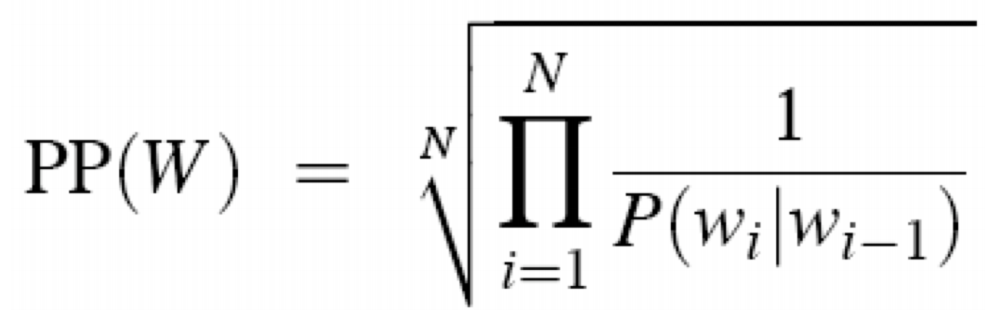

Lexical Diversity is the average number of times a given word has repeated across the text. So the more varied a vocabulary a text possesses, the higher the lexical diversity. Although there is no explicit formula for this; in layman terms, lexical diversity is looking at the total number of words in the text and then the number of unique words in that text. (type/token ratio)

There is a potential relationship because lexical diversity looks for variety and perplexity will measure the variety in a model. The perplexity of a model will give a good indication of the lexical diversity of a text. With regards to information content, in an attempt to create a rich piece of information, it might be overdone by having a high amount of lexical diversity. The more lexical diversity, the greater the uncertainity/entropy of the content thus leading to a greater perplexity of the model. 